<a href="https://colab.research.google.com/github/DevPrana/Class_Prediction_with-given_Features_ML/blob/main/Class_Prediction_KNN_IEEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/DevPrana/Class_Prediction_with-given_Features_ML/main/IEEE%20ML%20task%20data.csv')
data.head(9)

,Class,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12
0,C1,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,C2,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,C3,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,C4,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,C5,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,C6,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,C7,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,C8,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,C9,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963


In [75]:
data.isnull().any() 
# Checking for any null values so we can either drop the rows or replace data with median values from similar data

Class         False
Feature_1     False
Feature_2     False
Feature_3     False
Feature_4     False
Feature_5     False
Feature_6     False
Feature_7     False
Feature_8     False
Feature_9     False
Feature_10    False
Feature_11    False
Feature_12    False
dtype: bool

In [73]:
data.shape # rows and columns in a tuple (there are 85 rows and 13 columns with class ID and 12 features)

(85, 13)

In [74]:
data.describe() #Understanding basics about the data and notice abnormalities

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


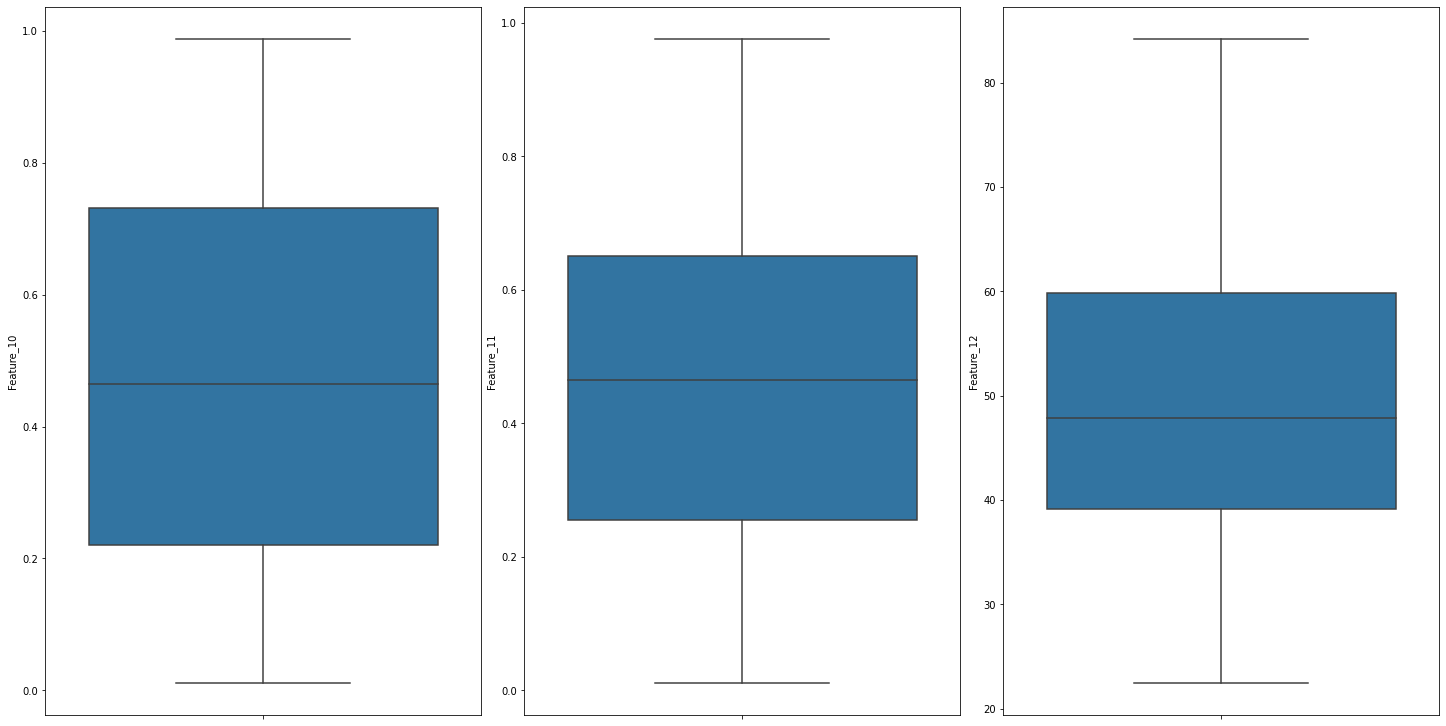

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#Using seaborn and matplotlib to visualize if there are any outliers present in the data if yes, Then check outlier percentage and put median/mean values.
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data[["Feature_10","Feature_11","Feature_12"]].items():
  sns.boxplot(y=k, data=data[["Feature_10","Feature_11","Feature_12"]], ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [71]:
data.corr() # To see if any two features are very closely related
#If there are then we will remove one of them

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12
Feature_1,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
Feature_2,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
Feature_3,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
Feature_4,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
Feature_5,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
Feature_6,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
Feature_7,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
Feature_8,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
Feature_9,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
Feature_10,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


To check whether there is any abnormality in regressive features (or if they are highly skewed so we can take log)

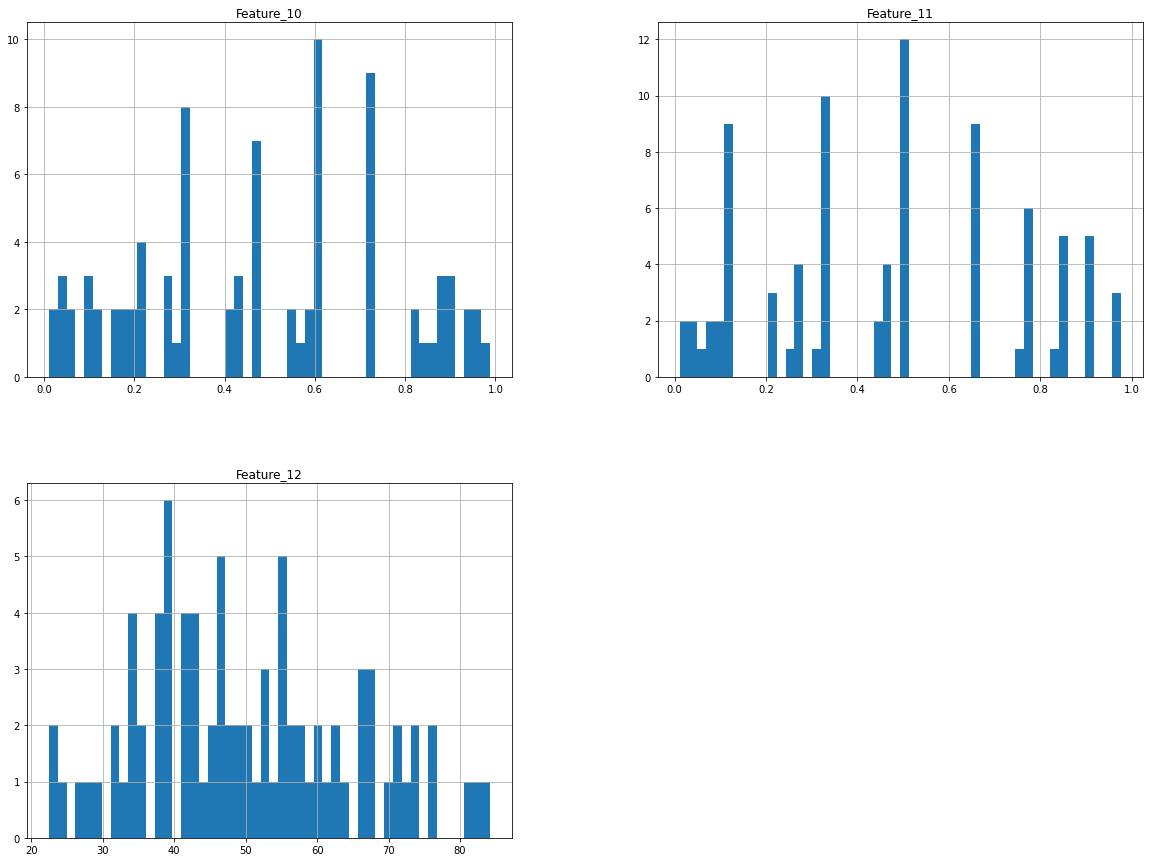

In [59]:
data[["Feature_10","Feature_11","Feature_12"]].hist(bins=50,figsize=(20,15))
plt.show()

We will train with the entire set since we need to predict all clasroom values (C1, C2 ... CN)

In [67]:
X_train = data.iloc[:,1:].values
y_train = data.iloc[:, 0:1].values

In [68]:
for i in range(len(X_train)):
  X_train[i][11]/=100
# We divide feature 12 by 100 for each value since the values are a lot higher than other features
# In KNN (k nearest neighbours) if one feature has a high value it will dominate over others when calculating the distance

In [69]:
X_train[9]

array([0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.60399997,
       0.32499999, 0.34517681])

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier()

To test we need to create a 2-D array of type numpy.ndarray and store all values inside and feature 12 should be divided by 100. Like in this example given below.

In [57]:
a=np.array([[0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.93199999,
       0.8900001, 0.66971725],])
y_pred = classifier.predict(a)

In [58]:
y_pred

array(['C10'], dtype=object)